 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 01 </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.

NOTE: First 4 questions are taken from: http://lcsl.mit.edu/courses/cbmmss/machine_learning/labs/Lab1.html


<b> Assignment on K-nearest neighbour </b>

<b> Part - 1 :  Data Generation </b>
1. Use Gaussian distribution with appropriate parameters and produce a dataset with four classes and 30 samples per class: the classes must live in the 2D space and be centered on the corners of the unit square (0,0), (0,1) (1,1), (1,0), all with variance 0.3.
2. Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1.
3. Generate a test set [Xte, Yte] from the same distribution, starting with 200 samples per class.
4. Visualize both sets using scatter plot on a 2-D plane.


In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Size of X_train := (120, 2), Y_train := (120, 1)
Size of X_test := (800, 2), Y_test := (800, 1)


Text(0, 0.5, 'y')

<Figure size 720x576 with 0 Axes>

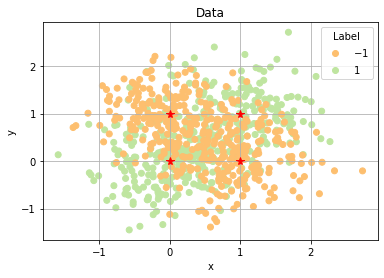

In [2]:
########################################
#Part1-(1) #Generating training data
########################################
#Define means and covariances 
mean1= np.array([0, 0])
mean2= np.array([0, 1])
mean3= np.array([1, 1])
mean4= np.array([1, 0])
cov= np.matrix([[0.3, 0], [0, 0.3]])
#You may use "np.random.multivariate_normal" function
np.random.seed(69) 
A_train = np.random.multivariate_normal(mean=mean1, cov=cov, size=(30))
B_train = np.random.multivariate_normal(mean=mean2, cov=cov, size=(30))
C_train = np.random.multivariate_normal(mean=mean3, cov=cov, size=(30))
D_train = np.random.multivariate_normal(mean=mean4, cov=cov, size=(30))


########################################
#Part1-(b) #Generating training labels
########################################
#  Point  -> Class
# ----------------
# A_train -> +1
# D_train -> +1
# B_train -> -1
# C_train -> -1
ones_train = np.ones((60, 1), dtype=int)
X_train = np.vstack((A_train, C_train, B_train, D_train))
Y_train = np.vstack((ones_train, -1*ones_train))

def shuffle_dataset(X, Y):
    m = X.shape[0]
    
    shuffler = np.arange(m)
    np.random.shuffle(shuffler)
    
    X = X[shuffler, :]
    Y = Y[shuffler, :]

shuffle_dataset(X_train, Y_train)

print("Size of X_train := {}, Y_train := {}".format(X_train.shape, Y_train.shape))

########################################
#Part1-(c) #Generating testing data with labels
########################################
A_test = np.random.multivariate_normal(mean=mean1, cov=cov, size=(200))
B_test = np.random.multivariate_normal(mean=mean2, cov=cov, size=(200))
C_test = np.random.multivariate_normal(mean=mean3, cov=cov, size=(200))
D_test = np.random.multivariate_normal(mean=mean4, cov=cov, size=(200))

ones_test = np.ones((400, 1), dtype=int)
X_test = np.vstack((A_test, C_test, B_test,  D_test))
Y_test = np.vstack((ones_test, -1*ones_test))

shuffle_dataset(X_test, Y_test)

print("Size of X_test := {}, Y_test := {}".format(X_test.shape, Y_test.shape))

########################################
#Part1-(d) #Visualizing data
########################################

plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
ax.title.set_text("Data")
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, vmin=-3, vmax=3, cmap="Spectral")
ax.plot(mean1[0], mean1[1], 'r*', markersize=8)
ax.plot(mean2[0], mean2[1], 'r*', markersize=8)
ax.plot(mean3[0], mean3[1], 'r*', markersize=8)
ax.plot(mean4[0], mean4[1], 'r*', markersize=8)
ax.grid()
ax.legend(*scatter.legend_elements(), title="Label")
ax.set_xlabel("x")
ax.set_ylabel("y")

<b> Part - 2: K-NN Classification  </b> The k-Nearest Neighbors algorithm (kNN) assigns to a test point the most frequent label of its k closest examples in the training set.
1. Write a function kNNClassify to generate predictions Yp for the 2-class data generated at Part1. Pick a ”reasonable” k.
2. Evaluate the classification performance (prediction error) by comparing the predicted labels Y_pred to the true labels Y_test.
3. Visualize the obtained results, e.g. by plotting the wrongly classified points using different colors/markers
4. Write a function to generate & visualize the decision regions of the 2D plane that are associated with each class, for a given classifier. Overlay the test points using scatter.


Accuracy of kNN classifier with k as 1 is 60.0%


Text(0, 0.5, 'y')

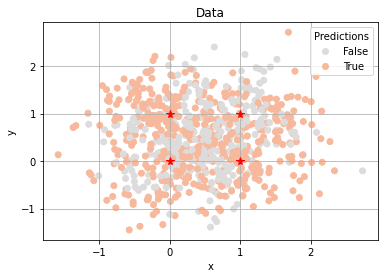

In [3]:
########################################
#Part2-(1) #Define kNNClassify Function
########################################
def distance_function(x1, x2):
    return np.linalg.norm(x1-x2, axis=1)

def kNNClassify(X_train, Y_train, X_test, k):
    Yp = []
    
    for idx in range(X_test.shape[0]):
        x_test = X_test[idx, :]
        sorter = np.argsort(distance_function(X_train, x_test))
        Y_sorted = Y_train[sorter][:k, 0]
        (unique, count) = np.unique(Y_sorted, return_counts=True)
        Yp.append(unique[np.argmax(count)])
    return np.array(Yp).reshape(-1, 1)

k = 1
Yp = kNNClassify(X_train, Y_train, X_test, k)


########################################
#Part2-(2) #Define a function to evaluate the performance
########################################
def KNNAccuracy(true, pred):
    return np.mean(true==pred)
print("Accuracy of kNN classifier with k as {} is {}%".format(k, np.round(KNNAccuracy(Y_test, Yp)*100), 2))

#Compute and print the classification accuracy 


########################################
#Part2-(c) #Plot the error points with different color
########################################
fig, ax = plt.subplots()
ax.title.set_text("Data")
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=(Y_test==Yp), vmin=-3, vmax=3, cmap="coolwarm")
ax.plot(mean1[0], mean1[1], 'r*', markersize=8)
ax.plot(mean2[0], mean2[1], 'r*', markersize=8)
ax.plot(mean3[0], mean3[1], 'r*', markersize=8)
ax.plot(mean4[0], mean4[1], 'r*', markersize=8)
ax.grid()
ax.legend(handles=scatter.legend_elements()[0], labels=["False", "True"], title="Predictions")
ax.set_xlabel("x")
ax.set_ylabel("y")

<b> Part - 3: Parameter selection: What is good value for k?  </b>

So far we considered an arbitrary choice for k. You will now wrrite the function *holdoutCVkNN* for model selection
1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for
validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out
procedure may be quite unstable.


> (a). Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.

> (b). Repeat the process for 10 times using a random cross-validation set each time with
a ρ = 0.3

> (c). Plot the training and validation errors for the different values of k.

> (d). How would you now answer the question "what is the best value for k"?

2. How is the value of k affected by ρ (percentage of points held out) and number of
repetitions? What does a large number of repetitions provide?
3. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

In [4]:
####################################
#Part - 3 (1)
####################################

def split_dataset(X, Y, validation_split):
    m = X.shape[0]
    m_valid = int(validation_split*m)
    
    shuffler = np.arange(m)
    np.random.shuffle(shuffler)

    X_train = X[shuffler[:(m-m_valid)]]
    Y_train = Y[shuffler[:(m-m_valid)]]
    X_valid = X[shuffler[-1*(m_valid):]]
    Y_valid = Y[shuffler[-1*(m_valid):]]
    
    return X_train, X_valid, Y_train, Y_valid 
    
#Define holdoutCVkNN() Function
def holdoutCVkNN(X, Y, k_range, numrep, rho):
    
    training_errors = np.zeros((len(k_range), numrep))
    validation_errors = np.empty_like(training_errors)
    
    for idx, k in enumerate(k_range):
        for i in range(numrep):
            X_train, X_valid, Y_train, Y_valid = split_dataset(X, Y, rho)
            
            Y_train_pred = kNNClassify(X_train, Y_train, X_train, k)
            Y_valid_pred = kNNClassify(X_train, Y_train, X_valid, k)
            
            training_errors[idx, i] = KNNAccuracy(Y_train, Y_train_pred)
            validation_errors[idx, i] = KNNAccuracy(Y_valid, Y_valid_pred)
    return training_errors, validation_errors

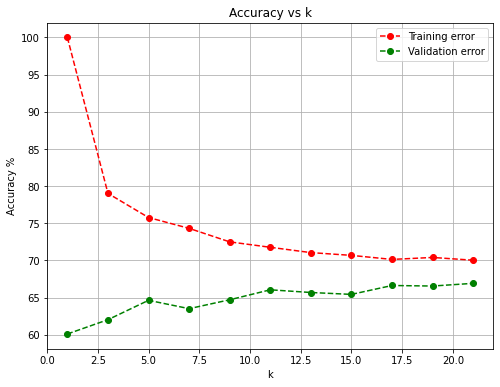

In [ ]:
X = np.vstack((X_train, X_test))
Y = np.vstack((Y_train, Y_test))

k_range = np.arange(1, 23, 2)
rho = 0.3
numrep = 10

training_errors, validation_errors = holdoutCVkNN(X, Y, k_range, numrep, rho)

#Plot training and validation errors for different values of k 

plt.figure(figsize=(8, 6))

plt.title("Accuracy vs k")
plt.plot(k_range, np.mean(training_errors, axis=1)*100, "--ro", label="Training error")
plt.plot(k_range, np.mean(validation_errors, axis=1)*100, "--go", label="Validation error")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.ylabel("Accuracy %")


#what is the best value for k? 





####################################
#Part3 - (2): Effect of rho and number repetations on k
####################################
training_errors_more_itrs_0_1, validation_errors_more_itrs_0_1 = holdoutCVkNN(X, Y, k_range, 200, 0.1)
training_errors_more_itrs_0_2, validation_errors_more_itrs_0_2 = holdoutCVkNN(X, Y, k_range, 200, 0.2)
training_errors_more_itrs_0_3, validation_errors_more_itrs_0_3 = holdoutCVkNN(X, Y, k_range, 200, 0.3)
training_errors_more_itrs_0_4, validation_errors_more_itrs_0_4 = holdoutCVkNN(X, Y, k_range, 200, 0.4)
training_errors_more_itrs_0_5, validation_errors_more_itrs_0_5 = holdoutCVkNN(X, Y, k_range, 200, 0.5)





####################################
#Part3 - (3): Evaluate the performance on test set with the best hyper parameters ( i.e best k ). 
####################################











In [ ]:
training_errors_more_itrs_0_1_cummu = np.cumsum(training_errors_more_itrs_0_1, axis=1)/(np.arange(200)+1)
validation_errors_more_itrs_0_1_cummu = np.cumsum(validation_errors_more_itrs_0_1, axis=1)/(np.arange(200)+1)

training_errors_more_itrs_0_2_cummu = np.cumsum(training_errors_more_itrs_0_2, axis=1)/(np.arange(200)+1)
validation_errors_more_itrs_0_2_cummu = np.cumsum(validation_errors_more_itrs_0_2, axis=1)/(np.arange(200)+1)

training_errors_more_itrs_0_3_cummu = np.cumsum(training_errors_more_itrs_0_3, axis=1)/(np.arange(200)+1)
validation_errors_more_itrs_0_3_cummu = np.cumsum(validation_errors_more_itrs_0_3, axis=1)/(np.arange(200)+1)

training_errors_more_itrs_0_4_cummu = np.cumsum(training_errors_more_itrs_0_4, axis=1)/(np.arange(200)+1)
validation_errors_more_itrs_0_4_cummu = np.cumsum(validation_errors_more_itrs_0_4, axis=1)/(np.arange(200)+1)

training_errors_more_itrs_0_5_cummu = np.cumsum(training_errors_more_itrs_0_5, axis=1)/(np.arange(200)+1)
validation_errors_more_itrs_0_5_cummu = np.cumsum(validation_errors_more_itrs_0_5, axis=1)/(np.arange(200)+1)

Text(0, 0.5, 'Accuracy %')

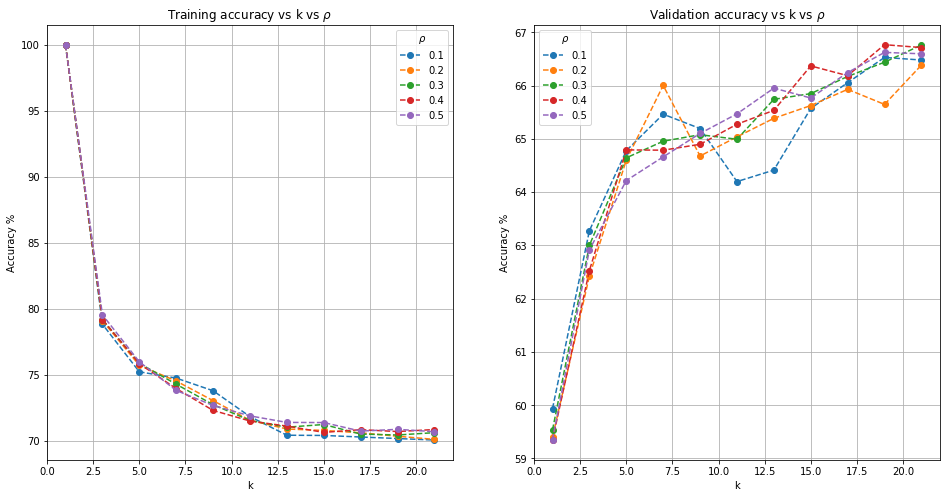

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Training accuracy vs k vs "+r'$\rho$')
plt.plot(k_range, np.mean(training_errors_more_itrs_0_1_cummu, axis=1)*100, "--o", label="0.1")
plt.plot(k_range, np.mean(training_errors_more_itrs_0_2_cummu, axis=1)*100, "--o", label="0.2")
plt.plot(k_range, np.mean(training_errors_more_itrs_0_3_cummu, axis=1)*100, "--o", label="0.3")
plt.plot(k_range, np.mean(training_errors_more_itrs_0_4_cummu, axis=1)*100, "--o", label="0.4")
plt.plot(k_range, np.mean(training_errors_more_itrs_0_5_cummu, axis=1)*100, "--o", label="0.5")
plt.xlabel("k")
plt.grid()
plt.legend(title=r'$\rho$')
plt.ylabel("Accuracy %")

plt.subplot(1, 2, 2)
plt.title("Validation accuracy vs k vs "+r'$\rho$')
plt.plot(k_range, np.mean(validation_errors_more_itrs_0_1_cummu, axis=1)*100, "--o", label="0.1")
plt.plot(k_range, np.mean(validation_errors_more_itrs_0_2_cummu, axis=1)*100, "--o", label="0.2")
plt.plot(k_range, np.mean(validation_errors_more_itrs_0_3_cummu, axis=1)*100, "--o", label="0.3")
plt.plot(k_range, np.mean(validation_errors_more_itrs_0_4_cummu, axis=1)*100, "--o", label="0.4")
plt.plot(k_range, np.mean(validation_errors_more_itrs_0_5_cummu, axis=1)*100, "--o", label="0.5")
plt.xlabel("k")
plt.grid()
plt.legend(title=r'$\rho$')
plt.ylabel("Accuracy %")

Text(0, 0.5, 'Accuracy %')

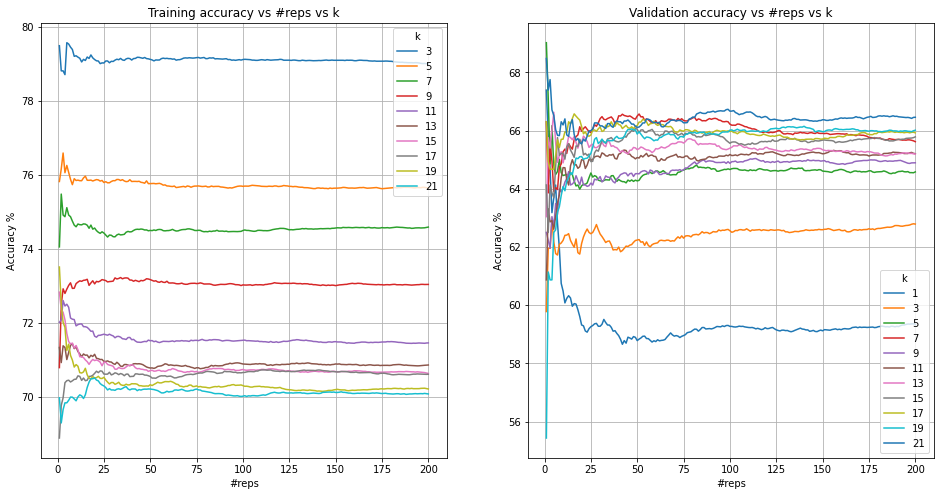

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Training accuracy vs #reps vs k")
for idx, k in enumerate(k_range):
  if idx != 0:
    plt.plot(np.arange(200)+1, training_errors_more_itrs_0_2_cummu[idx, :]*100, label=k)
plt.legend(title="k")
plt.grid()
plt.xlabel('#reps')
plt.ylabel('Accuracy %')

plt.subplot(1, 2, 2)
plt.title("Validation accuracy vs #reps vs k")
for idx, k in enumerate(k_range):
  plt.plot(np.arange(200)+1, validation_errors_more_itrs_0_2_cummu[idx, :]*100, label=k)
plt.legend(title="k")
plt.grid()
plt.xlabel('#reps')
plt.ylabel('Accuracy %')

<b> Part - 4: Size of training data and kNN regression  </b>

1. Dependence on training size: Evaluate the performance as the size of the training set
grows, e.g., n = {50, 100, 300, 500,...}. How would you choose a good range for k as n
changes? What can you say about the stability of the solution? Check by repeating the
validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or
adding noise by randomly flipping the labels on the training set.

In [5]:
##################################
#Part4 - (1): Performance evaluation as n increases
##################################
def gen_data_set(N, var=0.3):
  mean1= np.array([0, 0])
  mean2= np.array([0, 1])
  mean3= np.array([1, 1])
  mean4= np.array([1, 0])
  cov= np.matrix([[var, 0], [0, var]])
  
  A = np.random.multivariate_normal(mean=mean1, cov=cov, size=(N))
  B = np.random.multivariate_normal(mean=mean2, cov=cov, size=(N))
  C = np.random.multivariate_normal(mean=mean3, cov=cov, size=(N))
  D = np.random.multivariate_normal(mean=mean4, cov=cov, size=(N))

  ones = np.ones((2*N, 1), dtype=int)
  X = np.vstack((A, C, B, D))
  Y = np.vstack((ones, -1*ones))

  shuffle_dataset(X, Y)
  return X, Y

training_sizes = [50, 100, 300, 500, 1000, 1500]
validation_split = 0.2
k_range = np.arange(1, 23, 2)

train_errors = []
valid_errors = []
for n in training_sizes:
  X, Y = gen_data_set(n)
  te, ve = holdoutCVkNN(X, Y, k_range, 1, validation_split)
  train_errors.append(te[:, 0])
  valid_errors.append(ve[:, 0])

train_errors = np.array(train_errors)
valid_errors = np.array(valid_errors)


train_errors_1 = []
valid_errors_1 = []
for n in training_sizes:
  X, Y = gen_data_set(n)
  te, ve = holdoutCVkNN(X, Y, k_range, 10, validation_split)
  train_errors_1.append(np.mean(te, axis=1))
  valid_errors_1.append(np.mean(ve, axis=1))

train_errors_1 = np.array(train_errors_1)
valid_errors_1 = np.array(valid_errors_1)

##################################
#Part4 - (2): Ablation analysis : Mention classification accuracy on dataset with changing the variance and noise level
##################################


KeyboardInterrupt: 

Text(0, 0.5, 'Accuracy %')

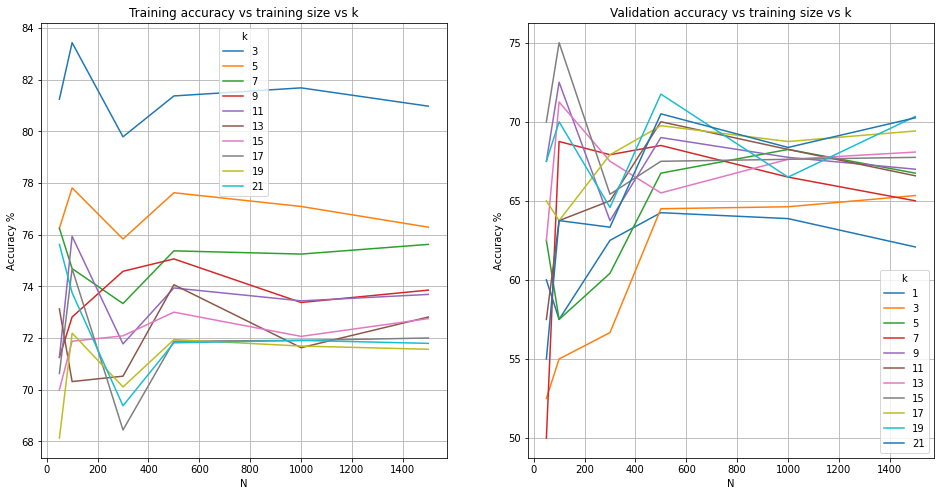

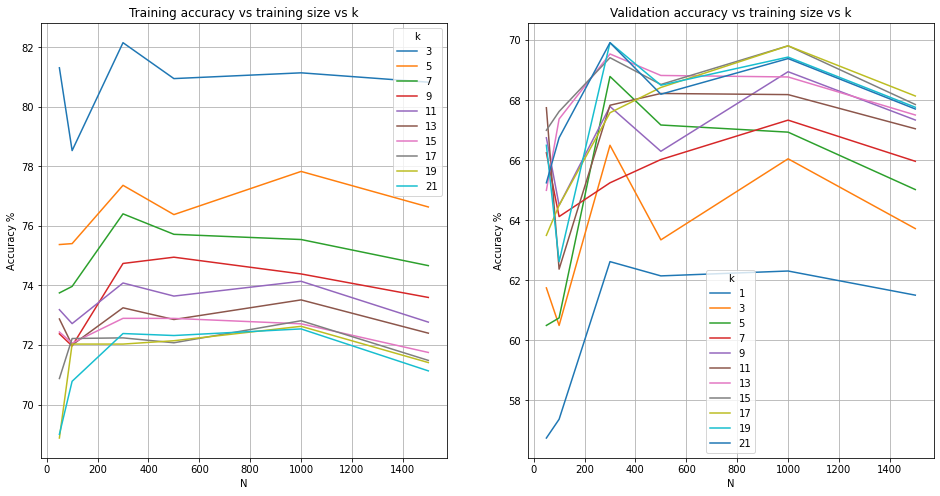

In [20]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Training accuracy vs training size vs k")
for idx, k in enumerate(k_range):
  if idx != 0:
    plt.plot(training_sizes, train_errors[:, idx]*100, label=k)
plt.legend(title="k")
plt.grid()
plt.xlabel('N')
plt.ylabel('Accuracy %')

plt.subplot(1, 2, 2)
plt.title("Validation accuracy vs training size vs k")
for idx, k in enumerate(k_range):
  plt.plot(training_sizes, valid_errors[:, idx]*100, label=k)
plt.legend(title="k")
plt.grid()
plt.xlabel('N')
plt.ylabel('Accuracy %')

## For 10 iterations
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title("Training accuracy vs training size vs k")
for idx, k in enumerate(k_range):
  if idx != 0:
    plt.plot(training_sizes, train_errors_1[:, idx]*100, label=k)
plt.legend(title="k")
plt.grid()
plt.xlabel('N')
plt.ylabel('Accuracy %')

plt.subplot(1, 2, 2)
plt.title("Validation accuracy vs training size vs k")
for idx, k in enumerate(k_range):
  plt.plot(training_sizes, valid_errors_1[:, idx]*100, label=k)
plt.legend(title="k")
plt.grid()
plt.xlabel('N')
plt.ylabel('Accuracy %')

In [17]:
print(train_errors_1.shape)

(6, 10)


<b> Part - 5: Digit classification on MNIST data  </b>
[[link to download MNIST data]( http://yann.lecun.com/exdb/mnist/)]
1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector.
> NOTE : If you had already written a kNNClassify for multi class classification in part 2, you are free to use it.
2. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
3. Apply these values to evaluate the performance on the test dataset.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.




In [ ]:
#Mount the drive
from google.colab import drive
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt

########################################
#Part5-(1) MNIST data reading and defining MultiClassKNNClassify
########################################

# MNIST Data reading ( you may define your own function for reading MNIST data )
#Extract .gz files and place in the drive 
drive.mount('/content/drive',force_remount=True)
root_path='/content/drive/MyDrive/PRMLAssignments/ProgrammingAssignment-01'

In [15]:
from mlxtend.data import loadlocal_mnist
root_path='/home/solomon/DataSet/PRMLAssignments/ProgrammingAssignment-01'
train_data_path = str(root_path) + "/" + 'train-images.idx3-ubyte'
train_label_path = str(root_path) + "/" + 'train-labels.idx1-ubyte'
test_data_path = str(root_path) + "/" + 't10k-images.idx3-ubyte'
test_label_path = str(root_path) + "/" + 't10k-labels.idx1-ubyte'
X_train, Y_train = loadlocal_mnist(images_path=train_data_path, labels_path=train_label_path)
X_test, Y_test = loadlocal_mnist(images_path=test_data_path, labels_path=test_label_path)

In [16]:


def MultiClassKNNClassify(X_train, Y_train, X_test, k, error_func):
  #error_func : For empirical selection of error function. egs : euclidean or any other distance metrics
  #Initialize an array/list to store the labels
  #Iterate through the test data  
    #Iterate through the training data
      #Compute the error between test data and training data  
    #Obtain k closest training data points
    #Assign label to test point based on majority voting
  #return Y_pred
  pass









########################################
#Part5-(2) Empirically chose most suitable k and error function based on the evauation on cross-validation data
########################################
#You may use fraction of training data for validation










########################################
#Part5-(3) Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
########################################









########################################
#Part5-(4) Create a confusion matrix for test data
########################################
#Define a function to obain the confusion matrix table
def compute_confusion_matrix(true, pred):
  N = np.unique(true).shape[0]
  confusion_matrix = np.zeros((N, N))

  for i in range(N):
    true_idxs = (true == i)
    positive_pred = pred[true_idxs]
    (unique, count) = np.unique(positive_pred, return_counts=True)
    for j, num in zip(unique, count):
      confusion_matrix[i, j] = num
  return confusion_matrix

def print_confusion_matrix(confusion_matrix):
  N = confusion_matrix.shape[0]
  print("\t\t\t\t\tCONFUSION MATRIX")
  print("True | +----------------------------------------------------------------------------------------+ Recall %")
  for i in range(N):
    print(" {}   | +\t".format(i), end="")
    for j in range(N): 
      print(int(confusion_matrix[i, j]), end="\t")
    print("+  {} %".format(np.round(confusion_matrix[i, i]/np.sum(confusion_matrix[i, :])*100, 1)))
  print("       +----------------------------------------------------------------------------------------+")
  print("Pred\t\t", end="")
  for i in range(N):
    print(i, end="\t")
  print("\nPrecision %", end="")
  print("   ", end="")
  for i in range(N):
    print("{} %".format(np.round(confusion_matrix[i, i]/np.sum(confusion_matrix[:, i])*100, 1)), end="  ")
  print("\n\t\t\t\t\tAccuracy %")
  print("\t\t\t\t\t  {} %".format(np.trace(confusion_matrix)/np.sum(confusion_matrix)*100))
########################################
#Part5-(5) Suggest an alternative ways to improve performance
########################################
'''
1.
2.
3.
4.
'''

'\n1.\n2.\n3.\n4.\n'

In [17]:
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
print("Size of X_train := {}, Y_train := {}".format(X_train.shape, Y_train.shape))
print("Size of X_test := {}, Y_test := {}".format(X_test.shape, Y_test.shape))

classes = np.unique(Y_train)

print("Unique classes of training data set are {}".format(classes))

Size of X_train := (60000, 784), Y_train := (60000, 1)
Size of X_test := (10000, 784), Y_test := (10000, 1)
Unique classes of training data set are [0 1 2 3 4 5 6 7 8 9]


In [ ]:
def dft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def idft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j ) / N
    return W

def dft(I):
    (M, N) = I.shape
    
    W_N = dft_matrix(N)
    W_M = dft_matrix(M)
    
    It = np.zeros((M, N), dtype=np.complex)
    It = W_M@I@W_N
    return It

def idft(It):
    (M, N) = It.shape
    W_N = idft_matrix(N)
    W_M = idft_matrix(M)
    
    I = np.zeros((M, N), dtype=int)
    I = np.clip(np.real(W_M@It@W_N), 0, 255)
    return I

In [23]:
def minkowski(x1, x2, p=2):
  return np.linalg.norm(x1-x2, axis=1, ord=p)

def difference_in_dft(x1, x2):
    
    X2 = x2.reshape(28, 28)
    X2_fft = np.fft.fft2(X2)
    Diff = []
    for i in range(x1.shape[0]):
        X1 = x1[i].reshape(28, 28)
        Diff.append(np.absolute(np.fft.fft2(X1)-X2_fft))
    return np.array(Diff) 

def sin_similarity(x1, x2):
    return np.sqrt(1 - np.power(np.divide((x1@x2), np.linalg.norm(x1, axis=1)*np.linalg.norm(x2)), 2))
    

def MultiClassKNNClassify(X_train, Y_train, X_test, k, error_func):
  Yp = []
    
  for idx in range(X_test.shape[0]):
      x_test = X_test[idx, :]
      sorter = np.argsort(error_func(X_train, x_test))
#       print(sorter)
      Y_sorted = Y_train[sorter][:k, 0]
      (unique, count) = np.unique(Y_sorted, return_counts=True)
      Yp.append(unique[np.argmax(count)])
      if (idx%10 == 0) and (idx != 0):
            print("[{}/{}] done!".format(idx, X_test.shape[0]), end="\r")
  print("[{}/{}] done!".format(X_test.shape[0], X_test.shape[0]))
  return np.array(Yp).reshape(-1, 1)

In [87]:
%timeit
Y_pred = MultiClassKNNClassify(X_train, Y_train, X_test[:1000, :], 2, minkowski)

[990/1000] done!


In [94]:
CM = compute_confusion_matrix(Y_test[:1000, :], Y_pred)
print_confusion_matrix(CM)

					CONFUSION MATRIX
True | +----------------------------------------------------------------------------------------+ Recall %
 0   | +	60	24	0	0	0	1	0	0	0	0	+  70.6 %
 1   | +	0	126	0	0	0	0	0	0	0	0	+  100.0 %
 2   | +	1	101	8	0	1	1	0	4	0	0	+  6.9 %
 3   | +	0	82	0	21	1	2	0	1	0	0	+  19.6 %
 4   | +	0	59	2	1	47	0	1	0	0	0	+  42.7 %
 5   | +	1	66	0	0	0	20	0	0	0	0	+  23.0 %
 6   | +	0	56	0	0	3	1	27	0	0	0	+  31.0 %
 7   | +	0	39	0	0	0	0	0	60	0	0	+  60.6 %
 8   | +	1	74	0	3	5	3	0	1	2	0	+  2.2 %
 9   | +	0	35	0	1	21	0	0	23	0	14	+  14.9 %
       +----------------------------------------------------------------------------------------+
Pred		0	1	2	3	4	5	6	7	8	9	
Precision %   95.2 %  19.0 %  80.0 %  80.8 %  60.3 %  71.4 %  96.4 %  67.4 %  100.0 %  100.0 %  
					Accuracy %
					  38.5 %


In [24]:
%timeit
Y_pred = MultiClassKNNClassify(X_train, Y_train, X_test[:100, :], 2, sin_similarity)

[100/100] done!


In [25]:
CM = compute_confusion_matrix(Y_test[:100, :], Y_pred)
print_confusion_matrix(CM)

					CONFUSION MATRIX
True | +----------------------------------------------------------------------------------------+ Recall %
 0   | +	0	8	0	0	0	0	0	0	0	0	+  0.0 %
 1   | +	0	14	0	0	0	0	0	0	0	0	+  100.0 %
 2   | +	0	8	0	0	0	0	0	0	0	0	+  0.0 %
 3   | +	0	11	0	0	0	0	0	0	0	0	+  0.0 %
 4   | +	0	14	0	0	0	0	0	0	0	0	+  0.0 %
 5   | +	0	7	0	0	0	0	0	0	0	0	+  0.0 %
 6   | +	0	10	0	0	0	0	0	0	0	0	+  0.0 %
 7   | +	0	15	0	0	0	0	0	0	0	0	+  0.0 %
 8   | +	0	2	0	0	0	0	0	0	0	0	+  0.0 %
 9   | +	0	11	0	0	0	0	0	0	0	0	+  0.0 %
       +----------------------------------------------------------------------------------------+
Pred		0	1	2	3	4	5	6	7	8	9	
Precision %   nan %  14.0 %  nan %  nan %  nan %  nan %  nan %  nan %  nan %  nan %  
					Accuracy %
					  14.000000000000002 %


<ipython-input-16-c143543ef9d3>:78: RuntimeWarning: invalid value encountered in double_scalars
  print("{} %".format(np.round(confusion_matrix[i, i]/np.sum(confusion_matrix[:, i])*100, 1)), end="  ")


In [ ]:
k_range = np.arange(1, 23, 2)
rho = 0.2
numrep = 1

training_errors, validation_errors = holdoutCVkNN(X_train, Y_train, k_range, numrep, rho)

<b> Report  </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your analysis



